In [60]:
import pandas as pd

In [61]:
from mlUtilities import Data

In [76]:
data = pd.read_csv('Data/5m_SPY')
data['Datetime'] = pd.to_datetime(data['Datetime'])

In [77]:
data.columns

Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [80]:
def vol_tide(data):
    '''Returns a data frame with 3 new columns:
    1. Vol_Direction: just 1 or -1 based on the direction of the change
    2. Dir_to_Vol: multiply Vol_Direction by Volume
    3. Vol_Tide: cumsum for over 1 day of data.
    Args:
        data(pd.DataFrame): expects a dataframe with the columns: Volume, Close
    '''
    if 'Vol_Direction' in data.columns:
        print('exists')
    else:
        data['Vol_Direction'] = Data.get_vol_direction(data)
        data['Dir_to_Vol'] = data['Vol_Direction'] * data['Volume']
        data['Vol_Tide'] = data.groupby([data['Datetime'].dt.date])['Dir_to_Vol'].cumsum()
    return data
        

In [81]:
data = vol_tide(data)
data.to_csv('Vol_Data2.csv')

exists


In [83]:
data.columns

Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Vol_Direction', 'Dir_to_Vol', 'Vol_Tide'],
      dtype='object')

<AxesSubplot:>

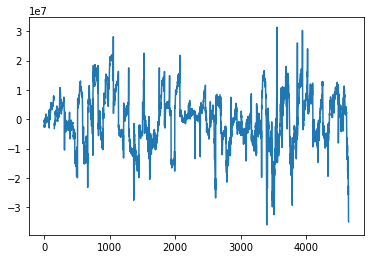

In [87]:
data['Vol_Tide'].plot()

In [89]:
eod_vol = data.groupby([data.Datetime.dt.date])['Dir_to_Vol'].sum()

<AxesSubplot:xlabel='Datetime'>

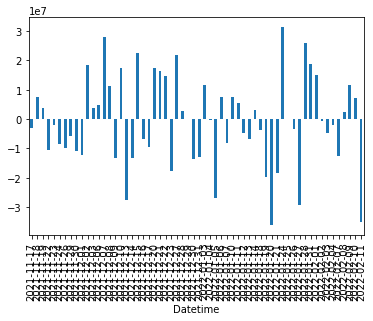

In [91]:
eod_vol.plot(kind='bar')

In [92]:
eod_vol.shape

(60,)

This is a solid start. 
Now I just have to compare the eod_vol with the value of Dir_to_Vol at the end
of the day.
They should match.

I can then take the series and add the eod values to the daily chart.